# CEWA 565 - Homework 2

Daniel Hogan

10/19/2021


## **Part A.** 

*Descriptive Plots: Decide which of your plots from Homework 1 are relevant to the question of whether a change in flood statistics occurred in the Sauk River around 1977.*
*Include these plots from Homework 1 here.
Discuss what you can see visually in the graphs that would lead you to believe that a change has or has not occurred.*

**The CDF plot below shows how the frequency of peak flows has shifted higher since 1977.**

![F1](cdf_plot.png)

**The PDF plot illustrates how the probability of a higher peak flow has increased since 1977.**

![F2](pdf_plot.png)

**The box plot comparison plot shows how the median peak flow has increased in value and the 75th percentile has shifted higher since 1977.**

![F3](box_plot.png)

## **Part B.**

*Two-sample test for a change in the mean: Test for statistical significance of the observed change in the mean annual peak flow around 1977.*

- *Use a two sample test, and alpha = 0.05 (95% confidence) and the z-distribution to define the rejection region.*
- *Discuss why using the z-distribution is appropriate here.*
- *Use the two-sample test to compare the data from 1977-2020 to the data from 1929-1976, accounting for the different sample sizes and sample standard deviations appropriately (remember to use the “pooled standard deviation”).*
- *For your null hypothesis, postulate that the difference between the two means = 0, and state the alternative hypothesis that the difference has changed (although you don't know the direction of this change) and state the test statistic you'll be using.*
- *Can you reject the null hypothesis?*
- *Calculate P after your test.*
- *How does your estimate of P change if your null hypothesis is that the difference in the mean between the two data sets is equal to 25% of the pre-1977 sample mean? (In other words, test with a new null hypothesis: the mean of the second period is 1.25 times the mean of the first period.)*

In [1]:
# import packages to be used
import numpy as np
import pandas as pd
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

In [3]:
# change working directory
# path = '/home/jovyan/Week-2/HW-2/'
# os.chdir(path)
# save each river peak flow file 
sauk_peaks = pd.read_excel('Sauk_peak_WY1929_2017.xlsx',skiprows=6).iloc[1:]

c:\Users\dlhogan\anaconda3\envs\sos_env\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
# genarate pre and post 1977 Sauk River datasets
sauk_peaks_b = sauk_peaks[sauk_peaks['water_year']<1977]
sauk_peaks_a = sauk_peaks[sauk_peaks['water_year']>=1977]
# check that sample size is long enough
b_len = len(sauk_peaks_b)
a_len = len(sauk_peaks_a)
if b_len < 30:
    print('{} Sauk River peak flow data points before 1977. Central limit theorem will not be accurate. \n\
    Normal distribution not appropriate.'.format(str(len(sauk_peaks_b))))
else:
    print('{} Sauk River peak flow data points before 1977. Central limit theorem can be used. \n\
    Normal distribution appropriate.'.format(str(len(sauk_peaks_b))))    
if a_len < 30:
    print('{} Sauk River peak flow data points after 1977. Central limit theorem will not be accurate. \n\
    Normal distribution not appropriate.'.format(str(len(sauk_peaks_a))))
else:
    print('{} Sauk River peak flow data points after 1977. Central limit theorem can be used. \n\
    Normal distribution appropriate.'.format(str(len(sauk_peaks_a))))


48 Sauk River peak flow data points before 1977. Central limit theorem can be used. 
    Normal distribution appropriate.
44 Sauk River peak flow data points after 1977. Central limit theorem can be used. 
    Normal distribution appropriate.


### Discuss why using the z-distribution is appropriate here.

Since both subsets of the overall data have n>30, the central limit theorem can be applied. This theorem stipulates that if a sample of n values is extracted from a population with mean $\mu$ and standard deviation $\sigma$, and n>30, then the means of these samples are *approximately* normally distributed. Although the data themselves are not normally distributed, the means are of these data.

### Use the two-sample test to compare the data from 1977-2020 to the data from 1929-1976, accounting for the different sample sizes and sample standard deviations appropriately (remember to use the “pooled standard deviation”).

Compute which $z_\alpha$ is equal to the confidence interval (95%) of our CDF

In [6]:
conf=0.05
z_alpha = stats.norm.ppf(conf)
print("z_alpha = {}".format(z_alpha)) 

z_alpha = -1.6448536269514729


Compute the pooled standard deviation, $s_{1,2} = \displaystyle\sqrt{ \displaystyle\frac{s^2_1}{n_1} + \displaystyle\frac{s^2_2}{n_2} }$

In [7]:
s_pooled = np.sqrt((sauk_peaks_b['peak_va'].std(ddof=1)**2)/b_len +
                   (sauk_peaks_a['peak_va'].std(ddof=1)**2)/a_len)
print('Pooled standard deviation is {} cfs'.format(str(s_pooled)))

Pooled standard deviation is 4025.984702086414 cfs


### For your null hypothesis, postulate that the difference between the two means = 0, and state the alternative hypothesis that the difference has changed (although you don't know the direction of this change) and state the test statistic you'll be using. Can you reject the null hypothesis? Calculate P after your test.

Null Hypothesis: $$\bar{x}-\bar{y} = \Delta_o$$
Alternate Hypotheses: $$\bar{x}-\bar{y} > \Delta_o$$ $$\bar{x}-\bar{y} < \Delta_o$$ $$\bar{x}-\bar{y} \neq \Delta_o$$
Compute z-test statistic value, assuming no difference in the sample mean ($\Delta_o = 0$) $$z_{test} = \frac{(\bar{x}-\bar{y})-\Delta_o}{s_{pooled}}$$



In [8]:
# null hypothesis: no change in sample means
delta = 0*sauk_peaks_b['peak_va'].mean()
# compute test statistic
z_test = ((sauk_peaks_a['peak_va'].mean()-sauk_peaks_b['peak_va'].mean())-
          delta)/s_pooled
print("z-score = {}".format(np.round(z_test,2))) 

z-score = 2.58


### Use a two sample test, and alpha = 0.05 (95% confidence) and the z-distribution to define the rejection region. Plot Z-test to visualize.

p = 0.005


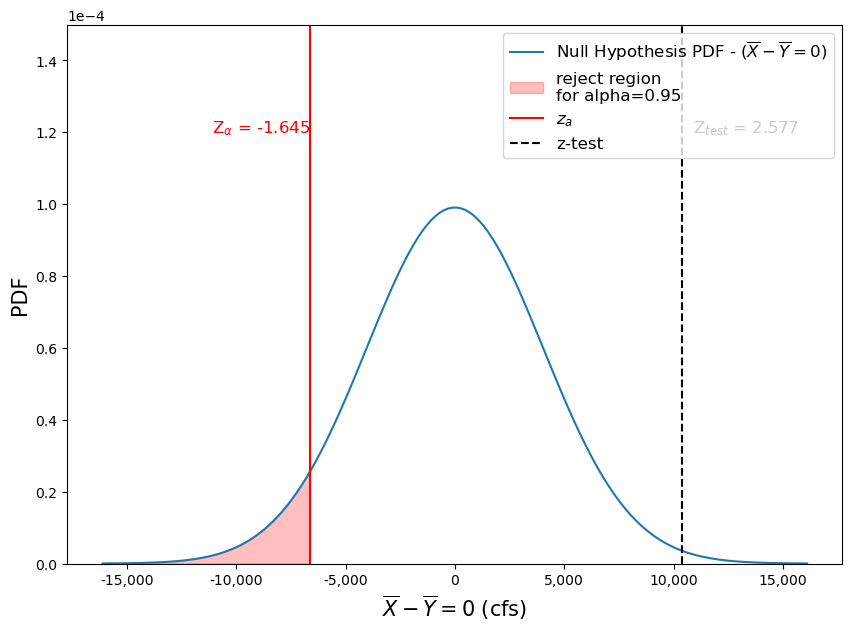

In [11]:
fig, ax = plt.subplots(figsize=(10,7))

# Reference 1 - code adapted from Lab 2-1
# create null pdf
z = np.linspace(-4,4, num=160)*s_pooled
ax.plot(z, 
        stats.norm.pdf(z,delta,s_pooled), 
        label='Null Hypothesis PDF - ($\overline{X}-\overline{Y}=0$)') # 0 and 1 are mu and sigma

# define alpha
alpha = 0.05
# Plot the region that z_test would have to fall in in order for us to reject the null hypothesis
conf = alpha
z_alpha = stats.norm.ppf(conf)
shade_region = np.linspace(np.min(z),z_alpha*s_pooled,10)
ax.fill_between(shade_region,
                stats.norm.pdf(shade_region,delta,s_pooled), 
                color='r', 
                alpha=0.25, 
                label='reject region\nfor alpha={}'.format(np.round(1-conf,2)))
# Plot a line at 95% confidence interval
plt.axvline(z_alpha*s_pooled, 
            color='r', 
            label='$z_{a}$')
plt.text(z_alpha*s_pooled-4500, 
         1.2e-4, 
         r'Z$_{\alpha}$ = '+str(round(z_alpha,3)), 
         fontsize=12, 
         color='r')
# Plot a line at z_test
plt.axvline(z_test*s_pooled, 
            color='black', 
            linestyle='--', 
            label='z-test')
plt.text(z_test*s_pooled+500, 
         1.2e-4, 
         r'Z$_{test}$ = '+str(round(z_test,3)), 
         fontsize=12, 
         color='k')
# Add labels
ax.set_ylim((0,1.5e-4))
ax.set_xlabel('$\overline{X}-\overline{Y}=0$ (cfs)', fontsize=15)
ax.set_ylabel('PDF', fontsize=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend(fontsize=12)
ax.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 1
# plt.title('Figure 2.2 - Null Hypothesis: No increse in Sauk River peak mean flows after 1977')
# compute p value
pvalue = 1 - stats.norm.cdf(z_test)
print("p = {}".format(np.round(pvalue,3)))

### Response:
The z-test run indicates that the null hypothesis can be rejected (i.e. peak flows have increased). The resultant p-value is 0.005.

### How does your estimate of P change if your null hypothesis is that the difference in the mean between the two data sets is equal to 25% of the pre-1977 sample mean? (In other words, test with a new null hypothesis: the mean of the second period is 1.25 times the mean of the first period.)

*New* Null Hypothesis: $$\bar{x}-\bar{y} = \Delta_{0.25}$$
Alternate Hypotheses: $$\bar{x}-\bar{y} > \Delta_{0.25}$$ $$\bar{x}-\bar{y} < \Delta_{0.25}$$ $$\bar{x}-\bar{y} \neq \Delta_{0.25}$$
Compute z-test statistic value, assuming no difference in the sample mean ($\Delta_{0.25} = 0.25\bar{Y}$) $$z_{test} = \frac{(\bar{x}-\bar{y})-\Delta_{0.25}}{s_{pooled}}$$

In [ ]:
# new null hypothesis: 25% change in sample means
delta = 0.25*sauk_peaks_b['peak_va'].mean()
# compute test statistic
z_test = ((sauk_peaks_a['peak_va'].mean()-sauk_peaks_b['peak_va'].mean())-
          delta)/s_pooled
print("z-score = {}".format(np.round(z_test,2))) 

z-score = 0.62


p = 0.269


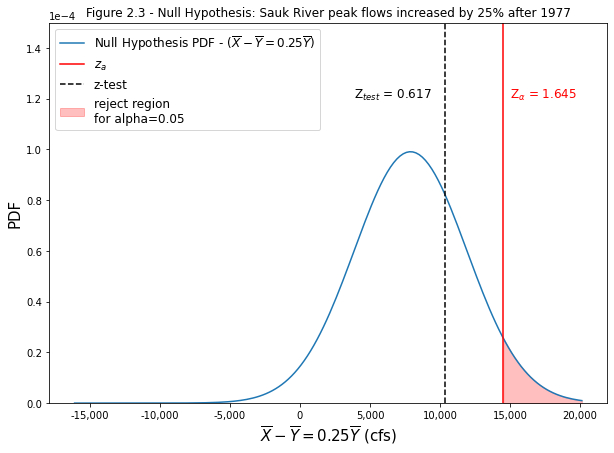

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

# Reference 1 - code adapted from Lab 2-1
# create null pdf
z = np.linspace(-4,5, num=160)*s_pooled
ax.plot(z, 
        stats.norm.pdf(z,delta,s_pooled), 
        label='Null Hypothesis PDF - ($\overline{X}-\overline{Y}=0.25 \overline{Y}$)') 

# define alpha
alpha = 0.05
# Plot the region that z_test would have to fall in in order for us to reject the null hypothesis
conf = 1-alpha
z_alpha = stats.norm.ppf(conf)
shade_region = np.linspace(z_alpha*s_pooled+delta,np.max(z),10)
ax.fill_between(shade_region,
                stats.norm.pdf(shade_region,delta,s_pooled), 
                color='r', 
                alpha=0.25, 
                label='reject region\nfor alpha={}'.format(np.round(1-conf,2)))
# Plot a line at 95% confidence interval
plt.axvline(z_alpha*s_pooled+delta, 
            color='r', 
            label='$z_{a}$')
plt.text(z_alpha*s_pooled+delta+500, 
         1.2e-4, 
         r'Z$_{\alpha}$ = '+str(round(z_alpha,3)), 
         fontsize=12, 
         color='r')
# Plot a line at z_test
plt.axvline(z_test*s_pooled+delta, 
            color='black', 
            linestyle='--', 
            label='z-test')
plt.text(z_test*s_pooled-6500+delta, 
         1.2e-4, 
         r'Z$_{test}$ = '+str(round(z_test,3)), 
         fontsize=12, 
         color='k')
# Add labels
ax.set_ylim((0,1.5e-4))
ax.set_xlabel('$\overline{X}-\overline{Y}=0.25 \overline{Y}$ (cfs)', fontsize=15)
ax.set_ylabel('PDF', fontsize=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend(fontsize=12)
ax.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 1
plt.title('Figure 2.3 - Null Hypothesis: Sauk River peak flows increased by 25% after 1977')
# compute p value
pvalue = 1 - stats.norm.cdf(z_test)
print("p = {}".format(np.round(pvalue,3)))

### Response:
In the above case, when the difference in the mean of the two data sets is equal to 25% of the pre-1977 sample mean, the null hypothesis is not rejected (peak flows have not increased by 25%). P increases significantly to approximately 0.27, meaning that $\alpha$ would need to be at least 0.27 in order for the null hypothesis to be rejected. If $\alpha$ were changed to reject the null hypothesis, the confidence interval would then be around 73%.

## **Part C.**

*Type II Error: What is the type II error and power for your test on the mean in the first part of B above?*

*- To answer this, assume that the true mean has in fact increased by 25%, and pooled standard deviation has increased by a factor of 1.2. In other words, assume that the “true” mean of the later period is 1.25 times the 1929-1976 mean, and that the “true” pooled standard deviation is 1.2 times sigma prime (our test estimate of pooled estimator for the two observed data sets).*

*- Draw or plot a graphic to represent this true distribution, and draw where your test statistic falls on this graph. Color the area of the graph that represents Type II error.*

*- Then answer the question - what is the type II error and power for your test in part B?*

### Assume that the true mean has in fact increased by 25%, and pooled standard deviation has increased by a factor of 1.2. In other words, assume that the “true” mean of the later period is 1.25 times the 1929-1976 mean, and that the “true” pooled standard deviation is 1.2 times sigma prime (our test estimate of pooled estimator for the two observed data sets).

$\bar{X_a}$ = mean peak flow after 1977

$\bar{X_b}$ = mean peak flow before 1977

Test estimate mean: $\bar{X_a}-\bar{X_b} = \Delta_o = 0$

Test estimate standard deviation: $\sigma' = \displaystyle\sqrt{ \displaystyle\frac{s^2_a}{n_1} + \displaystyle\frac{s^2_b}{n_2} }$

Compute z-test statistic value for test estimate: ($\Delta_o = 0$) 
$$z_{test} = \frac{(\bar{X_a}-\bar{X_b})}{\sigma'}$$

True mean: $\bar{X_a}-\bar{X_b} = \Delta_{0.25} = 0.25\bar{X_b}$

True pooled standard deviation = $s_{a,b} = 1.2\sigma'$

Compute z-test statistic value for true values: ($\Delta_{0.25} = 0.25\bar{X_b}$) 
$$z_{test} = \frac{(\bar{X_a}-\bar{X_b})-0.25\bar{X_b}}{1.2\sigma'}$$


In [ ]:
# estimate: no change in sample means
delta_0 = 0
# compute pooled standard deviation, sigma'
sigma_prime = np.sqrt((sauk_peaks_b['peak_va'].std(ddof=1)**2)/b_len +
                   (sauk_peaks_a['peak_va'].std(ddof=1)**2)/a_len)
print('Pooled standard deviation is {} cfs'.format(np.round(sigma_prime,2)))
# compute test statistic
z_test = ((sauk_peaks_a['peak_va'].mean()-sauk_peaks_b['peak_va'].mean())-
          delta_0)/sigma_prime
print("z-score for test estimate = {}".format(np.round(z_test,2))) 

Pooled standard deviation is 4025.98 cfs
z-score for test estimate = 2.58


In [ ]:
# true: 25% change in sample means
delta_true = 0.25*sauk_peaks_b['peak_va'].mean()
# compute pooled standard deviation, sigma'
s_true = 1.2*sigma_prime 
print('Pooled standard deviation is {} cfs'.format(np.round(s_true,2)))

Pooled standard deviation is 4831.18 cfs


Compute $z_{eff}$ from equation: $$\Delta^* + z_{eff}\sigma^* = \Delta_o + z_{\alpha}\sigma'$$

Rearranging this equation, we get:
$$z_{eff} = \frac{(\Delta_o + z_{\alpha}\sigma')-\Delta^*}{\sigma^*}$$

In [ ]:
# compute z_eff
z_eff = (delta_0 + z_alpha*sigma_prime - delta_true)/s_true
print("z-eff = {}".format(np.round(z_eff,2))) 

z-eff = -0.26


### Draw or plot a graphic to represent this true distribution, and draw where your test statistic falls on this graph. Color the area of the graph that represents Type II error.

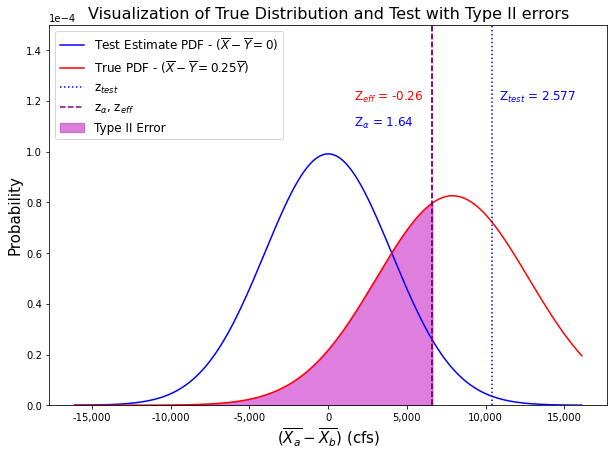

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

# Reference 2 - code adapted from Lab 2-2
z = np.linspace(-4,4, num=160)*sigma_prime
# create null pdf
ax.plot(z, 
        stats.norm.pdf(z,delta_0,sigma_prime), 
        color='blue',
        label='Test Estimate PDF - ($\overline{X}-\overline{Y}=0$)')
# create true pdf 
ax.plot(z, 
        stats.norm.pdf(z,delta_true,s_true), 
        color='red',
        label='True PDF - ($\overline{X}-\overline{Y}=0.25\overline{Y}$)')

# define alpha
alpha = 0.05

# Plot the region that z_test would have to fall in in order for us to reject the null hypothesis
conf = 1-alpha
z_alpha = stats.norm.ppf(conf)

# Plot a line at z_test
plt.axvline(z_test*sigma_prime, 
            color='b', 
            linestyle='dotted', 
            label=r'z$_{test}$')

# add label for z_test
plt.text(z_test*sigma_prime+500, 
         1.2e-4, 
         r'Z$_{test}$ = '+str(round(z_test,3)), 
         fontsize=12, 
         color='b')

# Plot line at z_alpha
plt.axvline(z_alpha*sigma_prime+delta_0, 
            color='purple', 
            linestyle='--', 
            label=r'z$_{\alpha}$, z$_{eff}$')

# Plot line at z_eff (for visualization purposes only)
plt.axvline(z_eff*s_true+delta_true, 
            color='purple', 
            linestyle='--')

# add labels for z_eff and z_alpha
plt.text(z_alpha*sigma_prime-5000, 
         1.2e-4, 
         r'Z$_{eff}$ = '+str(round(z_eff,2)), 
         fontsize=12, 
         color='r')
plt.text(z_alpha*sigma_prime-5000, 
         1.1e-4, 
         r'Z$_{\alpha}$ = '+str(round(z_alpha,2)), 
         fontsize=12, 
         color='b')

# Shade in the Type II Error area - everything from the min linspace to z_alpha*sigma_prime + delta_0
# this could also be z_eff*s_true + delta_true
shade = np.linspace(np.min(z),z_alpha*sigma_prime + delta_0, 30)
# fills up to the true pdf
plt.fill_between(shade, 
                 stats.norm.pdf(shade, delta_true, s_true) ,  
                 color='m', 
                 alpha=0.5, 
                 label='Type II Error')

# Add labels
ax.set_ylim((0,1.5e-4))
ax.set_title('Visualization of True Distribution and Test with Type II errors', fontsize = 16)
ax.set_xlabel('$(\overline{X_a}-\overline{X_b})$ (cfs)', fontsize=15)
ax.set_ylabel('Probability', fontsize=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend(fontsize=12)
ax.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 1


In [ ]:
# Reference 2 - code adapted from lab 2-2
# Look up the cdf value of the postulated true distribution at this point to get our beta vlaue
beta = stats.norm.cdf(z_eff)
print("Type II error: {}".format(np.round(beta,3)))

# Thus, our confidence that we are not commiting Type II error is
power = 1 - beta
print("Power: {}".format(np.round(power,3)))

Type II error: 0.396
Power: 0.604


### Response:

The type II error is 0.396 and the power is 0.604.

## **Part D.**

Wilcoxan Rank Sum Test:

- *Now test the significance of the change in the mean between the two sample periods using the two-sample Wilcoxan Rank Sum test.*
- *How different is your conclusion from the one in part B. (i.e. compare P for the two tests).*

In [ ]:
# Reference 2 - code adapted from lab 2-2
z_wilcoxan, p_wilcoxan = stats.ranksums(sauk_peaks_a['peak_va'], sauk_peaks_b['peak_va'])
print("Z from stats.ranksums: {}".format(np.round(z_wilcoxan,4)))
print("P (two-sided) from stats.ranksums: {}".format(np.round(p_wilcoxan,4)))

Z from stats.ranksums: 2.4973
P (two-sided) from stats.ranksums: 0.0125


P (one-sided): 0.0063


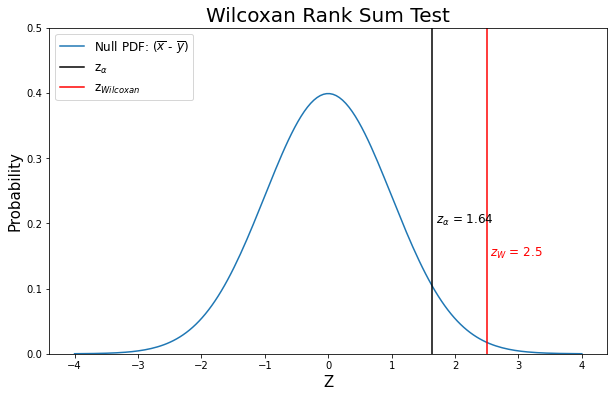

In [ ]:
# Reference 2 - code adapted from lab 2-2
# convert two-sided P value to one-sided
p_one_sided = p_wilcoxan/2
print('P (one-sided): {}'.format(np.round(p_one_sided,4)))
# Make a plot
plt.figure(figsize=(10,6))

# Create values for z
z = np.linspace(-4, 4, num=160)

# Plot the Null PDF
plt.plot(z, stats.norm.pdf(z), label='Null PDF: ($\overline{x}$ - $\overline{y}$)')

# Plot where z_alpha is
plt.axvline(z_alpha, color='black', label=r'z$_\alpha$')
# Add label here with alpha value
plt.text(z_alpha+0.05, 0.2, r'$z_{\alpha}$ = ' + str(round(z_alpha,2)),fontsize=12, color='k')

# Plot where z_test (from the Wilcoxan test)
plt.axvline(z_wilcoxan, color='red', label=r'z$_{Wilcoxan}$')
# Add label here with alpha value
plt.text(z_wilcoxan+0.05, 0.15, r'$z_{W}$ = ' + str(round(z_wilcoxan,2)),fontsize=12, color='r')

# Add title, legend, and labels
plt.title('Wilcoxan Rank Sum Test',fontsize=20)
plt.xlabel('Z', fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.ylim(0, 0.5)
plt.legend(loc='upper left',fontsize=12);

### Response:
When the null hypothesis is no change in mean peak flows ($\overline{X} - \overline{Y}=0$), $P=0.005$. The Wilcoxan sum-test resulted in a one-sided P value of $P= 0.006$. The P value for the Wilcoxan sum-test is very close to the P value calculated earlier, but it is slightly higher. The higher P value could indicate the Wilcoxan sum test showed slightly less confidence in the relationship between pre- and post- peak mean flows. Since the distribution of peak flows is heavil tailed, the Wilcoxan sum test could be more appropriate in this context.

## Part E.
*Chi Squared test for a change in the standard deviation: Lastly test for statistical significance of a change in the standard deviation.*

- *Even though it is not strictly true, assume that the sample data are derived from a normally distributed population. (While not required for this homework, we can follow up on the importance of this assumption by using Monte Carlo Tests as shown in Lab 2-3.)*
- *Use a single sample test (with rejection region based on the Chi Squared distribution), and assume that the sample standard deviation that you calculated from the 1929-1976 data is close to the true population standard deviation that you are testing for a change from.*

In [ ]:
# Reference 2 - code adapted from lab 2-2
# first calculate the test statistic
sd1 = sauk_peaks_b['peak_va'].std() # we pretend this is the "true population standard deviation
sd2 = sauk_peaks_a['peak_va'].std()
m = len(sauk_peaks_a['peak_va']) # len of data
t = (m-1)*sd2**2/sd1**2
print(t)

81.39321825340106


In [ ]:
# Reference 2 - code adapted from lab 2-2
alpha = 0.05 # set 95% confidence interval
vals = stats.chi2.ppf(alpha, m-1)
if t > vals:
    print('Test statistic is greater than cut-off value. An increase in standard deviation has occured.')
else:
    print('Test statistic is less than cut-off value. An increase in standard deviation has not occured.')

Test statistic is greater than cut-off value. An increase in standard deviation has occured.


### Response:
Assuming that our sample data is normally distributed, we can reject the null hypothesis (no increase in standard deviation has occured) since the test statistic was greater than the cut-off value. 

# Problem 2

**Course Project Selection**

I will be partnering up with Pritam Das. We will be exploring how forest disturbances impact measured snow variables (SWE, depth, density, day of last melt) at SNOTEL sites. We will also investigate if the type of disturbance (logging versus wildfire) plays a role in how measured variables are affected compared to these same values at nearby undisturbed locations. We will be using data from a variety of sources. We will take snow data from SNOTEL sites around the Washington (and possibly Oregon) for periods prior to and after forest disturbance. For finding disturbed SNOTEL sites, Joel Elkof (student in Becca Neumann's group) provided me with a dataset that summarizes the time, cause, and location of disturbances at SNOTEL measurement sites throughout the West. To look at the specific fires associated with the fire-related disturbances, Pritam and I found two databases (FIRMS and MTBS) that host fire severity data to help us see both the extent and strength of the fires that burned the sites we are interested in. To analyze and present this data, we will use a combination of tools acquired in this class including data visualization, comparisons of descriptive statistics, and hypothesis testing with small datasets (ANOVA test). Hopefully, as we continue to learn in this class, we can apply additional tools as we see fit. On the basis of forest disturbances and their effect on snow variables at these disturbed sites, we postulate there will be a change (either negative or positive) in snow measurements (either faster or slower melting). When specifially looking at the net impacts of logging versus fires, Pritam and I actually have differing hypotheses. Pritam speculates logging will have a more significant effect than fires on snow measurements due to more of the forest canopy being opened after clear-cutting. I speculate that fires will have a strong negative impact on snow variables due to increases in net longwave radiation caused by surrounding charred vegetation and increases in albedo related to the deposition of charred material. Conversely, I speculate logging could increase some of the measured snow variables.

# References:
1. CEWA 565 Lab 2-1 (available here: https://mountain-hydrology-research-group.github.io/data-analysis/modules/lab2/lab2-1.ipynb)
2. CEWA 565 Lab 2-2 (available here: https://mountain-hydrology-research-group.github.io/data-analysis/modules/lab2/lab2-2.ipynb)